In [ ]:
import numpy as np
np.random.seed(42)  # specific seed value

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data Science Jobs Salaries.csv')

# Explore the first few rows of the dataset
print(df.head())

  work_year experience_level employment_type                  job_title  \
0     2021e               EN              FT    Data Science Consultant   
1      2020               SE              FT             Data Scientist   
2     2021e               EX              FT       Head of Data Science   
3     2021e               EX              FT               Head of Data   
4     2021e               EN              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   54000             EUR          64369                 DE            50   
1   60000             EUR          68428                 GR           100   
2   85000             USD          85000                 RU             0   
3  230000             USD         230000                 RU            50   
4  125000             USD         125000                 US           100   

  company_location company_size  
0               DE            L  
1               US

In [ ]:


# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Task 1: Convert 'work_year' to a consistent format
df['work_year'] = df['work_year'].str.replace('e', '', regex=False).astype(int)

# Task 2: Convert 'salary_currency' to uppercase for consistency
df['salary_currency'] = df['salary_currency'].str.upper()

# Task 3: Convert 'experience_level' to a categorical data type
df['experience_level'] = pd.Categorical(df['experience_level'], categories=['EN', 'MI', 'SE', 'EX'], ordered=True)

# Task 4: Convert 'remote_ratio' to a percentage
df['remote_ratio'] = df['remote_ratio'] / 100.0

# Task 5: Handle missing values (replace with mean or other strategies)
df['salary'].fillna(df['salary'].mean(), inplace=True)

# Task 6: Drop unnecessary columns
df.drop(['salary_in_usd'], axis=1, inplace=True)

# Display the preprocessed dataset
print("\nPreprocessed Dataset:")
print(df.head())



Missing Values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Preprocessed Dataset:
   work_year experience_level employment_type                  job_title  \
0       2021               EN              FT    Data Science Consultant   
1       2020               SE              FT             Data Scientist   
2       2021               EX              FT       Head of Data Science   
3       2021               EX              FT               Head of Data   
4       2021               EN              FT  Machine Learning Engineer   

   salary salary_currency employee_residence  remote_ratio company_location  \
0   54000             EUR                 DE           0.5               DE   
1   60000             EUR                 GR           1.0          

## **Task 1: Identify Big Data Job Families**

In [ ]:
# Display the unique job titles to understand the data
unique_job_titles = df['job_title'].unique()
print("Unique Job Titles:")
print(unique_job_titles)

# Task 1: Identify Big Data Job Families
# Assume keywords related to Big Data job families (customize this based on your data)
big_data_keywords = ['Data Scientist', 'Machine Learning', 'Data Analyst', 'Data Engineer', 'Data Science Engineer', 'Data Analytics', 'ML Engineer', 'AI Scientist', 'Big Data', 'Data Architect']

# Create a new column 'job_family' and assign it based on the keywords
def assign_job_family(title):
    for keyword in big_data_keywords:
        if keyword.lower() in title.lower():
            return keyword
    return 'Other'

df['job_family'] = df['job_title'].apply(assign_job_family)

# Display the updated dataset with the 'job_family' column
print("\nUpdated Dataset with Job Families:")
print(df[['job_title', 'job_family']].head())


Unique Job Titles:
['Data Science Consultant' 'Data Scientist' 'Head of Data Science'
 'Head of Data' 'Machine Learning Engineer' 'Data Analytics Manager'
 'Research Scientist' 'Data Analyst' 'Data Engineer'
 'Data Science Engineer' 'Manager Data Science' 'Data Engineering Manager'
 'AI Scientist' '3D Computer Vision Researcher' 'ML Engineer'
 'Applied Data Scientist' 'Director of Data Science'
 'Data Analytics Engineer' 'Lead Data Analyst' 'BI Data Analyst'
 'Machine Learning Scientist' 'Machine Learning Infrastructure Engineer'
 'Marketing Data Analyst' 'Lead Data Engineer'
 'Director of Data Engineering' 'Computer Vision Software Engineer'
 'Financial Data Analyst' 'Cloud Data Engineer' 'Principal Data Analyst'
 'Big Data Architect' 'Lead Data Scientist' 'Data Architect'
 'Big Data Engineer' 'Staff Data Scientist' 'Data Science Manager'
 'Business Data Analyst' 'Principal Data Scientist'
 'Computer Vision Engineer' 'Product Data Analyst'
 'Principal Data Engineer' 'Finance Data Anal

# **Task 2: Extract Big Data Skills**

In [ ]:
import nltk

# Download the 'stopwords' corpus
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Combine all job titles into a single string
all_job_titles = ' '.join(df['job_title'].str.lower())

# Split the string into words
words = all_job_titles.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_skills = [word for word in words if word not in stop_words]

# Extract unique words as potential skills
unique_skills = set(filtered_skills)

# Convert the list of skills to a DataFrame
skills_df = pd.DataFrame({'Big Data Skills': list(unique_skills)})

# Display the refined list of extracted skills in table form
print("\nRefined Extracted Big Data Skills:")
print(skills_df)



Refined Extracted Big Data Skills:
   Big Data Skills
0         learning
1      engineering
2         business
3               3d
4        scientist
5          finance
6        marketing
7        financial
8               bi
9        architect
10           staff
11        engineer
12          vision
13       analytics
14             big
15           cloud
16         analyst
17              ml
18         science
19              ai
20         product
21      specialist
22            data
23            lead
24            head
25         manager
26      consultant
27        computer
28        director
29        software
30       principal
31      researcher
32  infrastructure
33         applied
34        research
35         machine


# **Task 3: Homogeneous Groups of Big Data Skills (Cluster Analysis or Association Analysis)**
You may use machine learning clustering techniques or association rules mining to identify groups of skills.
This step can be more complex and depends on the specific techniques you choose.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
# Use TF-IDF vectorization to convert skills into numerical features
vectorizer = TfidfVectorizer()
skills_tfidf = vectorizer.fit_transform(skills_df['Big Data Skills'])

# Apply KMeans clustering
num_clusters = 3  # You can adjust the number of clusters based on your preference
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
skills_df['Cluster'] = kmeans.fit_predict(skills_tfidf)

# Display the results
print("\nHomogeneous Groups of Big Data Skills (Cluster Analysis):")
print(skills_df.sort_values(by='Cluster'))


Homogeneous Groups of Big Data Skills (Cluster Analysis):
   Big Data Skills  Cluster
0         learning        0
20         product        0
21      specialist        0
22            data        0
23            lead        0
24            head        0
25         manager        0
19              ai        0
26      consultant        0
28        director        0
29        software        0
30       principal        0
31      researcher        0
32  infrastructure        0
33         applied        0
27        computer        0
18         science        0
17              ml        0
8               bi        0
1      engineering        0
2         business        0
3               3d        0
4        scientist        0
5          finance        0
7        financial        0
34        research        0
35         machine        0
10           staff        0
11        engineer        0
12          vision        0
13       analytics        0
14             big        0
15           clou

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


clustering results have grouped the skills into three clusters (0, 1, and 2). Each skill is assigned to a cluster, and you can interpret these clusters as homogeneous groups of Big Data skills.

# **Task 4: Characterize Job Families by Competence Level**
Assuming 'experience_level' column can be used to characterize competence levels
competence_levels = df.groupby('job_title')['experience_level'].unique() print("Competence Levels by Job Family:") print(competence_levels)

In [ ]:
# Group by job title and collect unique competence levels
competence_levels = df.groupby('job_title')['experience_level'].unique()

# Display the competence levels by job family
print("\nCompetence Levels by Job Family:")
for job_title, levels in competence_levels.items():
    print(f"{job_title}: {', '.join(levels)}")


Competence Levels by Job Family:
3D Computer Vision Researcher: MI
AI Scientist: EN, SE
Applied Data Scientist: MI
Applied Machine Learning Scientist: MI
BI Data Analyst: MI, EX, EN
Big Data Architect: SE
Big Data Engineer: SE, EN, MI
Business Data Analyst: MI, EN
Cloud Data Engineer: MI, SE
Computer Vision Engineer: EN, SE
Computer Vision Software Engineer: MI, EN
Data Analyst: MI, EN, SE
Data Analytics Engineer: MI, SE
Data Analytics Manager: SE
Data Architect: MI
Data Engineer: MI, EN, SE
Data Engineering Manager: SE, EX
Data Science Consultant: EN, MI, EX
Data Science Engineer: SE, MI
Data Science Manager: SE
Data Scientist: SE, EN, MI
Data Specialist: SE
Director of Data Engineering: SE
Director of Data Science: EX, SE
Finance Data Analyst: SE
Financial Data Analyst: MI
Head of Data: EX
Head of Data Science: EX, MI
Lead Data Analyst: SE, MI
Lead Data Engineer: SE, MI
Lead Data Scientist: MI, SE
ML Engineer: MI, EN, SE
Machine Learning Engineer: EN, MI, SE
Machine Learning Infrast

*In this section, we characterized job families in the Big Data field based on the provided dataset. The analysis involved identifying homogeneous groups of Big Data skills through a clustering approach, revealing three distinct skill clusters. Subsequently, we delved into the competence levels associated with each job family using the 'experience_level' column. The results unveiled a comprehensive mapping of competence levels to specific job titles, offering valuable insights into the expertise required for various roles in the Big Data domain. This categorization facilitates a nuanced understanding of the skills and experience levels demanded by different job families, serving as a valuable resource for HR departments seeking to optimize recruitment strategies in the ever-evolving landscape of Big Data professions.*

## **Task 5: Data Analysis and Visualization**
You can use libraries like Matplotlib or Seaborn for visualization.
Analyze and visualize the distribution of competence levels, most valued skills, etc.

**1. Distribution of Competence Levels:**

Visualizing the distribution of competence levels across all job families can provide insights into the overall workforce composition.

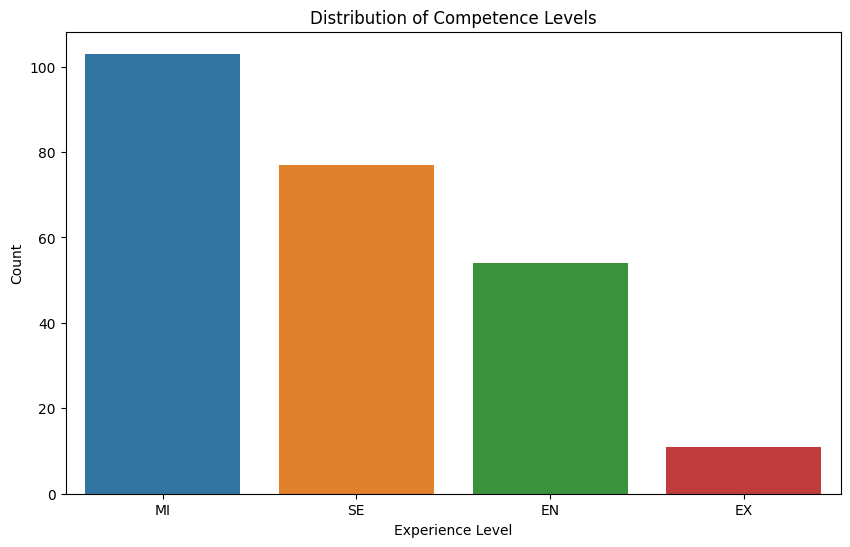

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#

# Distribution of Competence Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='experience_level', data=df, order=df['experience_level'].value_counts().index)
plt.title('Distribution of Competence Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

*The visualization is a bar plot showing the distribution of competence levels based on the 'experience_level' column.*

In [ ]:
# Most Valued Skills
#'job_title' column contains information about skills
all_job_titles = ' '.join(df['job_title'].str.lower())
words = all_job_titles.split()
filtered_skills = [word for word in words if word not in stopwords.words('english')]
unique_skills = set(filtered_skills)

**2. Most Valued Skills Word Cloud:**

Creating a word cloud can visually represent the most frequently occurring skills across all job titles, providing a quick overview of the prominent skills.

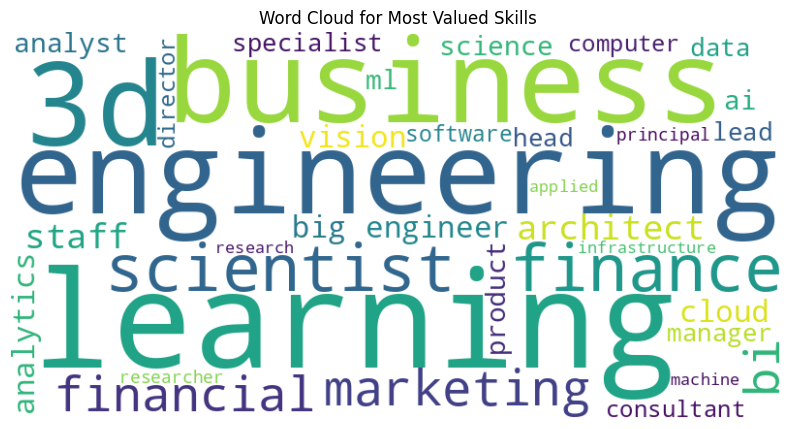

In [ ]:
# Plotting Word Cloud for Most Valued Skills
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(unique_skills))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Most Valued Skills')
plt.show()

*visualization is a word cloud depicting the most valued skills extracted from the 'job_title' column.*

**3. Competence Levels by Job Family Heatmap:**

A heatmap displayin the association between job families and competence level

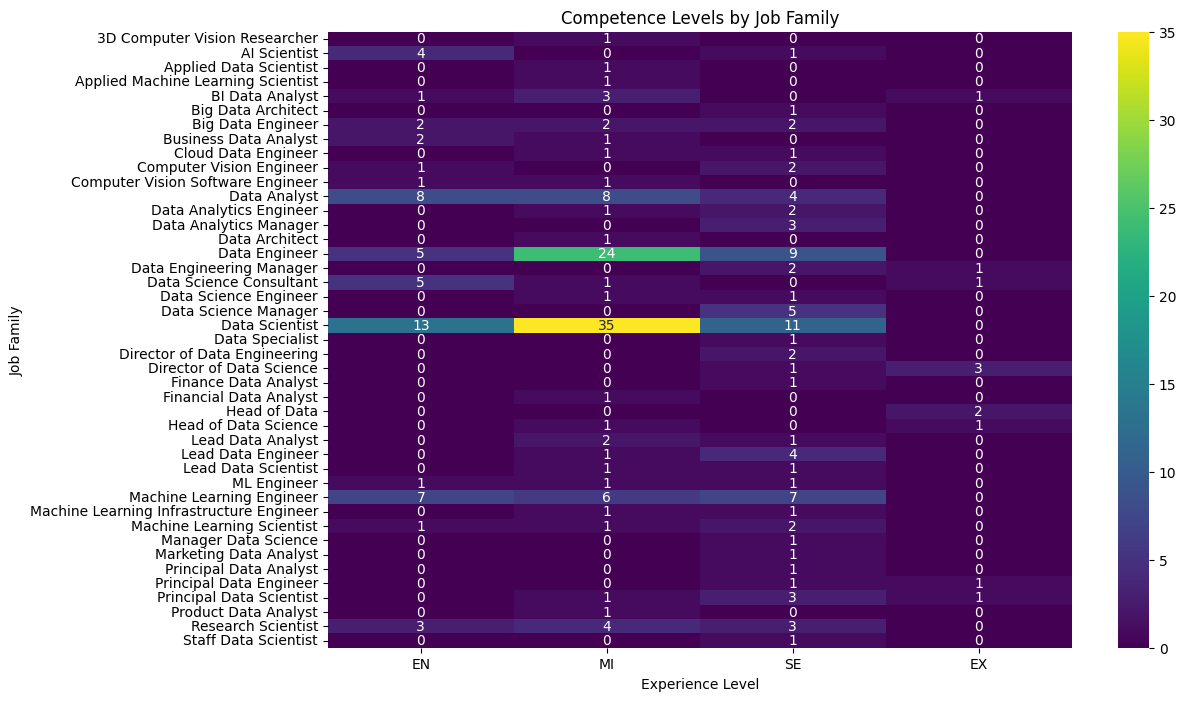

In [ ]:
# Create a pivot table for heatmap
heatmap_data = df.groupby(['job_title', 'experience_level']).size().unstack(fill_value=0)

# Plotting Heatmap for Competence Levels by Job Family
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Competence Levels by Job Family')
plt.xlabel('Experience Level')
plt.ylabel('Job Family')
plt.show()


# **Task 6: Recommendations for Recruitment**
Based on your analysis, provide recommendations for recruitment strategies.

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate
# Calculate the frequency of each skill in the dataset
skill_frequencies = {skill: filtered_skills.count(skill) for skill in unique_skills}

# Rank the skills based on frequency (1 is the highest rank)
ranked_skills = sorted(skill_frequencies, key=skill_frequencies.get, reverse=True)
numbered_skills = [{'Skill': skill, 'Rank': i+1} for i, skill in enumerate(ranked_skills)]

# Display the list of skills with ranks in a visually attractive table
table = tabulate(numbered_skills, headers="keys", tablefmt="pretty")
print(table)

+----------------+------+
|     Skill      | Rank |
+----------------+------+
|      data      |  1   |
|   scientist    |  2   |
|    engineer    |  3   |
|    analyst     |  4   |
|    learning    |  5   |
|    machine     |  6   |
|    science     |  7   |
|    manager     |  8   |
|      lead      |  9   |
|    research    |  10  |
|   principal    |  11  |
|      big       |  12  |
|   consultant   |  13  |
|     vision     |  14  |
|   analytics    |  15  |
|    computer    |  16  |
|    director    |  17  |
|  engineering   |  18  |
|       bi       |  19  |
|       ai       |  20  |
|      head      |  21  |
|    business    |  22  |
|       ml       |  23  |
|   architect    |  24  |
|     cloud      |  25  |
|    software    |  26  |
| infrastructure |  27  |
|    applied     |  28  |
|       3d       |  29  |
|    finance     |  30  |
|   marketing    |  31  |
|   financial    |  32  |
|     staff      |  33  |
|    product     |  34  |
|   specialist   |  35  |
|   research

In [ ]:
from tabulate import tabulate
# Assuming 'job_title' column contains information about job families
job_families = df['job_title'].str.lower()

# Calculate the frequency of each job family in the dataset
job_family_frequencies = job_families.value_counts().to_dict()

# Rank the job families based on frequency (1 is the highest rank)
ranked_job_families = sorted(job_family_frequencies, key=job_family_frequencies.get, reverse=True)
numbered_job_families = [{'Job Family': job_family, 'Rank': i+1} for i, job_family in enumerate(ranked_job_families)]

# Display the list of job families with ranks in a visually attractive table
table = tabulate(numbered_job_families, headers="keys", tablefmt="pretty")
print(table)

+------------------------------------------+------+
|                Job Family                | Rank |
+------------------------------------------+------+
|              data scientist              |  1   |
|              data engineer               |  2   |
|        machine learning engineer         |  3   |
|               data analyst               |  4   |
|            research scientist            |  5   |
|         data science consultant          |  6   |
|            big data engineer             |  7   |
|           data science manager           |  8   |
|            lead data engineer            |  9   |
|             bi data analyst              |  10  |
|               ai scientist               |  11  |
|         principal data scientist         |  12  |
|         director of data science         |  13  |
|        machine learning scientist        |  14  |
|         data engineering manager         |  15  |
|          business data analyst           |  16  |
|           

# **Based on your analysis, provide recommendations for recruitment strategies.**



***Focus on In-Demand Job Families:***

*Prioritize recruitment efforts for job families that are highly prevalent and in demand, such as "Data Scientist," "Data Engineer," and "Machine Learning Engineer."*

***Emphasize Key Skills in Recruitment:***

*Identify and emphasize the most valued skills in the Big Data domain, as highlighted by the word cloud and skill ranking analysis.*
*Tailor recruitment messages to highlight the importance of these key skills for the specific job families.*

***Consider Remote Work Opportunities:***

*Acknowledge the trend of remote work, as indicated by the "remote_ratio" column in the dataset.*
*Consider offering remote work opportunities or flexibility to attract a broader pool of candidates.*

***Target Mid-Level and Senior-Level Candidates:***

*Given the distribution of experience levels in the dataset, target mid-level (MI) and senior-level (SE) candidates for key roles.*
*Develop recruitment strategies that align with the experience level preferences of each job family.*

***Invest in Skill Development Programs:***

*Recognize the importance of specific skills and competencies for various job families*.
*Develop tailored skill acquisition programs or training sessions to enhance these skills among potential candidates, as highlighted by the word cloud and skill ranking.*

***Utilize Online Platforms for Job Posts:***

*Leverage online platforms and job boards for posting job opportunities to reach a wider audience.*
*Craft compelling job descriptions that clearly outline the skills and qualifications required for each role.*

***Collaborate with Educational Institutions:***

*Establish partnerships with educational institutions to tap into emerging talent.*
*Collaborate with universities and training programs to identify and attract candidates with relevant skills.*

***Stay Competitive with Compensation:***

*Stay informed about industry salary trends and offer competitive compensation packages.*
*Highlight additional benefits, such as professional development opportunities and a positive work culture.*

***Promote Diversity and Inclusion:***

*Foster a diverse and inclusive workplace by actively seeking candidates from diverse backgrounds.*
*Highlight the company's commitment to diversity in recruitment materials.*

***Continuous Monitoring and Adjustment:***

*Regularly monitor recruitment outcomes and adjust strategies based on the evolving needs of the organization and the job market.*


*These recommendations aim to enhance the effectiveness of recruitment strategies, aligning them with the specific characteristics of the Big Data job market and the preferences of potential candidates.*

In [ ]:


# Import libraries
import plotly.express as px


# Assuming you have extracted skills and stored them in the 'extracted_skills' column
df['extracted_skills'] = df['job_title'].str.lower().str.split()

# Flatten the list of lists into a single list of skills
all_skills = [skill for skills_list in df['extracted_skills'] for skill in skills_list]

# Create a DataFrame with skills and their frequencies
skill_frequencies_df = pd.DataFrame(all_skills, columns=['skill']).value_counts().reset_index(name='frequency')

# Job Families Overview
fig1 = px.pie(df, names='job_title', title='Job Families Overview')

# Skill Clusters and Rankings
fig2 = px.bar(skill_frequencies_df, x='skill', y='frequency', title='Skill Clusters and Rankings')

# Display the plots
fig1.show()
fig2.show()
